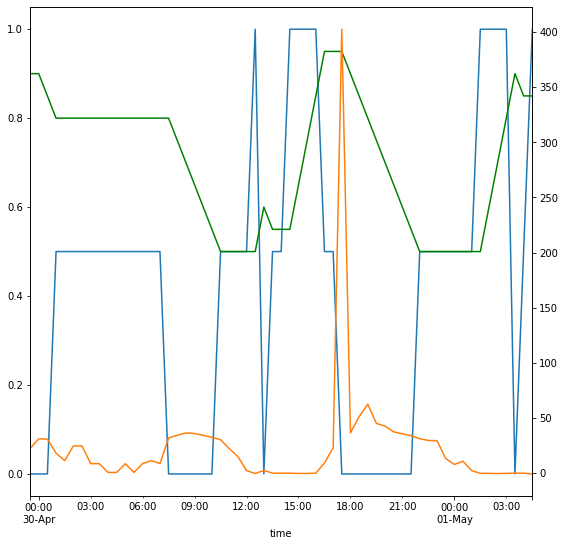

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from model import Model
from appliance import Appliance

## Ramps are now in percentage
## min and max level are also in percentage
app = Appliance(max_load=100, maintain_load=10, max_level=1, min_level=0.5, ramp_up=0.1, ramp_down=0.05)

#start percentage has to be between max and min
#state {NSW1, QLD1, VIC1, SA1, TAS1}
model = Model(start_percentage=0.9, n=1000, app=app, state='TAS1')
model.ramp_down


model.run_model()


##plotting Code
cheapest_path_node, index = model.get_cheapest_path()
timesteps = model.time_steps
df = pd.DataFrame({'time': timesteps,
                   'onoffpath': cheapest_path_node.path,
                   'state': cheapest_path_node.state_value})
df1 = model.forecast_price
df.set_index('time', inplace=True)
plt.figure(figsize=(9,9))
df.onoffpath.plot()
df1.RRP.plot(secondary_y=True)
df.state.plot(style='g')